### 군마트(PX) 인기품목 현황
- 기간범위 : 2015년 ~ 2024년 월별
- 선정기준 : 판매금액, 판매개수 별 20개 선정
- 작성기관 : 국방부 국군복지관

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 윈도우라면 보통 'Malgun Gothic' 있음
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)  # 마이너스 깨짐 방지

In [84]:

# cp949 또는 euc-kr 시도
df = pd.read_csv("mart_sales.csv", encoding="cp949")

# 만약 그래도 안 되면 utf-8-sig 도 시도
# df = pd.read_csv("mart_sales.csv", encoding="utf-8-sig")

print(df.head())
print(df.info())



    행번호  판매년도  판매월 선정기준               상품명
0  2340  2024   12   수량         테라캔 355ml
1  2340  2024   12   수량         테라캔 355ml
2  2339  2024   12   수량  참이슬fresh(121001)
3  2339  2024   12   수량  참이슬fresh(121001)
4  2338  2024   12   수량           카스맥주(캔)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행번호     2420 non-null   int64 
 1   판매년도    2420 non-null   int64 
 2   판매월     2420 non-null   int64 
 3   선정기준    2420 non-null   object
 4   상품명     2420 non-null   object
dtypes: int64(3), object(2)
memory usage: 94.7+ KB
None


### 연도별 국군복지단 운영 군마트(PX) 상위 물품
- 기간 : 2015년 ~ 2024년
- 분류 : 주류, 음료, 공중전화(통신), 화장품, 라면, 담배, 건강식품, 생필품

In [87]:
import re

# 카테고리 매핑 딕셔너리
category_map = {
    # 음료
    "박카스": "음료", "조지아": "음료", "맥심": "음료", "몬스터": "음료",
    "코카콜라": "음료", "사이다": "음료", "펩시": "음료",
    "포카리": "음료", "삼다수": "음료", "석수": "음료",
    "파워에이드": "음료",

    # 주류
    "참이슬": "주류", "맥주": "주류", "카스": "주류", "테라": "주류",

    # 공중전화
    "군인카드": "공중전화",

    # 화장품
    "크림": "화장품", "닥터지": "화장품", "네일": "화장품", 
    "마스크": "화장품", "다이아몬드": "화장품",

    # 라면
    "신라면": "라면", "육개장": "라면",

    # 담배
    "레종": "담배", "말보로": "담배", "메비우스": "담배", "에쎄": "담배",

    # 건강식품
    "홍삼": "건강식품",

    # 생필품
    "보온대": "생필품", "손난로": "생필품"
}

# 카테고리 분류 함수
def categorize(product_name):
    name = str(product_name)

    # '박카스'는 음료로 강제
    if re.search(r"박카스", name):
        return "음료"
    # '카스'인데 '박카스'는 제외 → 주류
    if re.search(r"(?<!박)카스", name):
        return "주류"

    # 일반 매핑
    for key, value in category_map.items():
        if key in name:
            return value
    return "기타"

# 카테고리 컬럼 생성
df["카테고리"] = df["상품명"].apply(categorize)

print(df.head())


    행번호  판매년도  판매월 선정기준               상품명 카테고리
0  2340  2024   12   수량         테라캔 355ml   주류
1  2340  2024   12   수량         테라캔 355ml   주류
2  2339  2024   12   수량  참이슬fresh(121001)   주류
3  2339  2024   12   수량  참이슬fresh(121001)   주류
4  2338  2024   12   수량           카스맥주(캔)   주류


In [88]:
# 연도별-선정기준-카테고리 집계
criteria_rank = (
    df.groupby(["판매년도", "선정기준", "카테고리"])
    .size()
    .reset_index(name="등장횟수")
    .sort_values(["판매년도", "선정기준", "등장횟수"], ascending=[True, True, False])
)

# 연도별 수량 vs 금액 TOP5
top5_criteria = criteria_rank.groupby(["판매년도", "선정기준"]).head(5)

for year in sorted(top5_criteria["판매년도"].unique()):
    print(f"\n=== {year}년 수량/금액 기준 TOP5 카테고리 ===")
    display(top5_criteria[top5_criteria["판매년도"] == year])



=== 2015년 수량/금액 기준 TOP5 카테고리 ===


,판매년도,선정기준,카테고리,등장횟수
5,2015,금액,음료,45
6,2015,금액,화장품,12
2,2015,금액,기타,11
0,2015,금액,건강식품,10
1,2015,금액,공중전화,9
10,2015,수량,음료,44
7,2015,수량,기타,38
8,2015,수량,라면,6
9,2015,수량,생필품,2



=== 2016년 수량/금액 기준 TOP5 카테고리 ===


,판매년도,선정기준,카테고리,등장횟수
15,2016,금액,음료,38
11,2016,금액,건강식품,32
13,2016,금액,기타,21
16,2016,금액,화장품,21
12,2016,금액,공중전화,4
20,2016,수량,음료,62
17,2016,수량,기타,37
18,2016,수량,라면,12
19,2016,수량,생필품,9



=== 2017년 수량/금액 기준 TOP5 카테고리 ===


,판매년도,선정기준,카테고리,등장횟수
21,2017,금액,건강식품,39
25,2017,금액,화장품,33
24,2017,금액,음료,29
22,2017,금액,기타,15
23,2017,금액,생필품,4
29,2017,수량,음료,67
26,2017,수량,기타,26
27,2017,수량,라면,18
28,2017,수량,생필품,9



=== 2018년 수량/금액 기준 TOP5 카테고리 ===


,판매년도,선정기준,카테고리,등장횟수
32,2018,금액,담배,42
34,2018,금액,화장품,42
30,2018,금액,건강식품,32
33,2018,금액,주류,3
31,2018,금액,기타,1
39,2018,수량,음료,43
40,2018,수량,주류,24
36,2018,수량,담배,17
41,2018,수량,화장품,13
37,2018,수량,라면,11



=== 2019년 수량/금액 기준 TOP5 카테고리 ===


,판매년도,선정기준,카테고리,등장횟수
45,2019,금액,화장품,58
42,2019,금액,건강식품,30
43,2019,금액,담배,28
44,2019,금액,주류,4
49,2019,수량,음료,47
50,2019,수량,주류,24
51,2019,수량,화장품,23
47,2019,수량,라면,18
48,2019,수량,생필품,5



=== 2020년 수량/금액 기준 TOP5 카테고리 ===


,판매년도,선정기준,카테고리,등장횟수
57,2020,금액,화장품,48
54,2020,금액,담배,41
52,2020,금액,건강식품,18
56,2020,금액,주류,10
55,2020,금액,음료,2
61,2020,수량,음료,38
62,2020,수량,주류,34
59,2020,수량,라면,21
60,2020,수량,생필품,10
58,2020,수량,기타,9



=== 2021년 수량/금액 기준 TOP5 카테고리 ===


,판매년도,선정기준,카테고리,등장횟수
69,2021,금액,화장품,45
68,2021,금액,주류,28
65,2021,금액,담배,20
67,2021,금액,음료,9
64,2021,금액,건강식품,7
73,2021,수량,음료,37
74,2021,수량,주류,36
71,2021,수량,라면,20
72,2021,수량,생필품,10
70,2021,수량,기타,4



=== 2022년 수량/금액 기준 TOP5 카테고리 ===


,판매년도,선정기준,카테고리,등장횟수
82,2022,금액,화장품,52
81,2022,금액,주류,42
80,2022,금액,음료,12
76,2022,금액,건강식품,6
78,2022,금액,담배,6
87,2022,수량,주류,55
86,2022,수량,음료,33
84,2022,수량,라면,20
85,2022,수량,생필품,11
83,2022,수량,기타,1



=== 2023년 수량/금액 기준 TOP5 카테고리 ===


,판매년도,선정기준,카테고리,등장횟수
93,2023,금액,주류,74
94,2023,금액,화장품,52
92,2023,금액,음료,16
89,2023,금액,기타,8
88,2023,금액,건강식품,4
99,2023,수량,주류,76
98,2023,수량,음료,43
96,2023,수량,라면,18
97,2023,수량,생필품,12
100,2023,수량,화장품,9



=== 2024년 수량/금액 기준 TOP5 카테고리 ===


,판매년도,선정기준,카테고리,등장횟수
105,2024,금액,주류,52
106,2024,금액,화장품,49
104,2024,금액,음료,17
101,2024,금액,건강식품,6
103,2024,금액,생필품,4
111,2024,수량,주류,50
110,2024,수량,음료,38
108,2024,수량,라면,19
112,2024,수량,화장품,13
109,2024,수량,생필품,9


In [68]:
# 연도별-선정기준-카테고리 등장 횟수 집계
criteria_category_rank = (
    df.groupby(["판매년도", "선정기준", "카테고리"])
    .size()
    .reset_index(name="등장횟수")
    .sort_values(["판매년도", "선정기준", "등장횟수"], ascending=[True, True, False])
)

# 연도별·선정기준별 카테고리 TOP5 추출
top5_criteria_cat = criteria_category_rank.groupby(["판매년도", "선정기준"]).head(5)

# 출력
for year in sorted(top5_criteria_cat["판매년도"].unique()):
    print(f"\n=== {year}년 수량/금액 기준 카테고리 TOP5 ===")
    display(top5_criteria_cat[top5_criteria_cat["판매년도"] == year])



=== 2015년 수량/금액 기준 카테고리 TOP5 ===


,판매년도,선정기준,카테고리,등장횟수
5,2015,금액,음료,45
6,2015,금액,화장품,12
2,2015,금액,기타,11
0,2015,금액,건강식품,10
1,2015,금액,공중전화,9
10,2015,수량,음료,44
7,2015,수량,기타,38
8,2015,수량,라면,6
9,2015,수량,생필품,2



=== 2016년 수량/금액 기준 카테고리 TOP5 ===


,판매년도,선정기준,카테고리,등장횟수
15,2016,금액,음료,38
11,2016,금액,건강식품,32
13,2016,금액,기타,21
16,2016,금액,화장품,21
12,2016,금액,공중전화,4
20,2016,수량,음료,62
17,2016,수량,기타,37
18,2016,수량,라면,12
19,2016,수량,생필품,9



=== 2017년 수량/금액 기준 카테고리 TOP5 ===


,판매년도,선정기준,카테고리,등장횟수
21,2017,금액,건강식품,39
25,2017,금액,화장품,33
24,2017,금액,음료,29
22,2017,금액,기타,15
23,2017,금액,생필품,4
29,2017,수량,음료,67
26,2017,수량,기타,26
27,2017,수량,라면,18
28,2017,수량,생필품,9



=== 2018년 수량/금액 기준 카테고리 TOP5 ===


,판매년도,선정기준,카테고리,등장횟수
32,2018,금액,담배,42
34,2018,금액,화장품,42
30,2018,금액,건강식품,32
33,2018,금액,주류,3
31,2018,금액,기타,1
39,2018,수량,음료,43
40,2018,수량,주류,24
36,2018,수량,담배,17
41,2018,수량,화장품,13
37,2018,수량,라면,11



=== 2019년 수량/금액 기준 카테고리 TOP5 ===


,판매년도,선정기준,카테고리,등장횟수
45,2019,금액,화장품,58
42,2019,금액,건강식품,30
43,2019,금액,담배,28
44,2019,금액,주류,4
49,2019,수량,음료,47
50,2019,수량,주류,24
51,2019,수량,화장품,23
47,2019,수량,라면,18
48,2019,수량,생필품,5



=== 2020년 수량/금액 기준 카테고리 TOP5 ===


,판매년도,선정기준,카테고리,등장횟수
57,2020,금액,화장품,48
54,2020,금액,담배,41
52,2020,금액,건강식품,18
56,2020,금액,주류,10
55,2020,금액,음료,2
61,2020,수량,음료,38
62,2020,수량,주류,34
59,2020,수량,라면,21
60,2020,수량,생필품,10
58,2020,수량,기타,9



=== 2021년 수량/금액 기준 카테고리 TOP5 ===


,판매년도,선정기준,카테고리,등장횟수
69,2021,금액,화장품,45
68,2021,금액,주류,28
65,2021,금액,담배,20
67,2021,금액,음료,9
64,2021,금액,건강식품,7
73,2021,수량,음료,37
74,2021,수량,주류,36
71,2021,수량,라면,20
72,2021,수량,생필품,10
70,2021,수량,기타,4



=== 2022년 수량/금액 기준 카테고리 TOP5 ===


,판매년도,선정기준,카테고리,등장횟수
82,2022,금액,화장품,52
81,2022,금액,주류,42
80,2022,금액,음료,12
76,2022,금액,건강식품,6
78,2022,금액,담배,6
87,2022,수량,주류,55
86,2022,수량,음료,33
84,2022,수량,라면,20
85,2022,수량,생필품,11
83,2022,수량,기타,1



=== 2023년 수량/금액 기준 카테고리 TOP5 ===


,판매년도,선정기준,카테고리,등장횟수
93,2023,금액,주류,74
94,2023,금액,화장품,52
92,2023,금액,음료,16
89,2023,금액,기타,8
88,2023,금액,건강식품,4
99,2023,수량,주류,76
98,2023,수량,음료,43
96,2023,수량,라면,18
97,2023,수량,생필품,12
100,2023,수량,화장품,9



=== 2024년 수량/금액 기준 카테고리 TOP5 ===


,판매년도,선정기준,카테고리,등장횟수
105,2024,금액,주류,52
106,2024,금액,화장품,49
104,2024,금액,음료,17
101,2024,금액,건강식품,6
103,2024,금액,생필품,4
111,2024,수량,주류,50
110,2024,수량,음료,36
108,2024,수량,라면,19
112,2024,수량,화장품,13
109,2024,수량,생필품,9


### 2. 품목별 인기 상품 현황

In [89]:
# 연도별 카테고리별 등장횟수 집계
yearly_cat_items = (
    df.groupby(["판매년도", "카테고리", "상품명"])
    .size()
    .reset_index(name="등장횟수")
    .sort_values(["판매년도", "카테고리", "등장횟수"], ascending=[True, True, False])
)

# 연도별 카테고리별 TOP1 상품만 뽑기
top1_yearly_cat = yearly_cat_items.groupby(["판매년도", "카테고리"]).head(1)

for year in sorted(top1_yearly_cat["판매년도"].unique()):
    print(f"\n=== {year}년 카테고리별 TOP 상품 ===")
    display(top1_yearly_cat[top1_yearly_cat["판매년도"] == year])



=== 2015년 카테고리별 TOP 상품 ===


,판매년도,카테고리,상품명,등장횟수
1,2015,건강식품,홍삼원세트,9
2,2015,공중전화,LGU군인카드,9
9,2015,기타,싱그린화장지,9
17,2015,라면,신라면,7
18,2015,생필품,보온대,4
20,2015,음료,박카스에이 캔,16
29,2015,화장품,듀이트리울트라바이탈라이징스네일크림,9



=== 2016년 카테고리별 TOP 상품 ===


,판매년도,카테고리,상품명,등장횟수
31,2016,건강식품,홍삼보운,12
35,2016,공중전화,LGU군인카드,4
38,2016,기타,몽쉘딸기케이크(소),14
50,2016,라면,신라면,11
52,2016,생필품,보온대,7
61,2016,음료,코카콜라(250㎖),24
65,2016,화장품,듀이트리울트라바이탈라이징스네일크림,12



=== 2017년 카테고리별 TOP 상품 ===


,판매년도,카테고리,상품명,등장횟수
69,2017,건강식품,홍삼보운,12
74,2017,기타,뉴트리팩,9
87,2017,라면,신라면,12
89,2017,생필품,보온대,6
99,2017,음료,코카콜라(250㎖),24
104,2017,화장품,듀이트리울트라바이탈라이징스네일크림,12



=== 2018년 카테고리별 TOP 상품 ===


,판매년도,카테고리,상품명,등장횟수
108,2018,건강식품,홍삼보운,12
113,2018,기타,빅팜 불닭,2
120,2018,담배,말보로 골드 오리지널,21
124,2018,라면,신라면,6
126,2018,생필품,보온대,4
132,2018,음료,코카콜라(250㎖),12
138,2018,주류,카스맥주(캔),15
142,2018,화장품,닥터지 블랙 스네일 크림_50ml,18



=== 2019년 카테고리별 TOP 상품 ===


,판매년도,카테고리,상품명,등장횟수
150,2019,건강식품,홍삼보운,12
155,2019,담배,말보로 골드 오리지널,15
157,2019,라면,육개장사발면,10
158,2019,생필품,보온대,3
163,2019,음료,제주삼다수 500ml,10
172,2019,주류,카스맥주(캔),16
177,2019,화장품,닥터지 블랙 스네일 크림_50ml,24



=== 2020년 카테고리별 TOP 상품 ===


,판매년도,카테고리,상품명,등장횟수
182,2020,건강식품,홍삼진고,12
183,2020,기타,맛있는오뚜기밥,7
187,2020,담배,레종 프렌치블랙,11
193,2020,라면,육개장사발면,12
195,2020,생필품,보온대,5
198,2020,음료,몬스터에너지 울트라,12
206,2020,주류,참이슬fresh,17
214,2020,화장품,닥터지 블랙 스네일 크림_50ml,18



=== 2021년 카테고리별 TOP 상품 ===


,판매년도,카테고리,상품명,등장횟수
220,2021,건강식품,홍삼원세트,3
222,2021,기타,맛있는오뚜기밥,4
225,2021,담배,에쎄 체인지 히말라야,11
227,2021,라면,육개장사발면,11
229,2021,생필품,보온대,5
233,2021,음료,몬스터에너지 울트라,20
240,2021,주류,참이슬fresh,21
247,2021,화장품,닥터지 블랙 스네일 크림_50ml,14



=== 2022년 카테고리별 TOP 상품 ===


,판매년도,카테고리,상품명,등장횟수
250,2022,건강식품,홍삼원세트,3
252,2022,기타,맛있는오뚜기밥,1
254,2022,담배,에쎄 체인지 히말라야,6
255,2022,라면,신라면,12
258,2022,생필품,보온대,5
261,2022,음료,몬스터에너지 울트라,20
282,2022,주류,테라캔 355ml,24
286,2022,화장품,다이아몬드 리페어 퍼펙트 세트,12



=== 2023년 카테고리별 TOP 상품 ===


,판매년도,카테고리,상품명,등장횟수
292,2023,건강식품,홍삼보운,2
298,2023,기타,자민경크레마카라콜오리지날프리미어,3
300,2023,담배,에쎄 체인지 히말라야,2
301,2023,라면,신라면,16
303,2023,생필품,보온대,9
306,2023,음료,몬스터에너지 울트라,31
311,2023,주류,참이슬fresh(121001),32
316,2023,화장품,Dr.G레드-블래미쉬클리어크림_70ml,16



=== 2024년 카테고리별 TOP 상품 ===


,판매년도,카테고리,상품명,등장횟수
324,2024,건강식품,홍삼원세트,4
326,2024,기타,아몬드빼빼로,1
329,2024,라면,신라면,13
332,2024,생필품,보온대,9
334,2024,음료,몬스터에너지 울트라,25
340,2024,주류,참이슬fresh(121001),26
344,2024,화장품,Dr.G레드-블래미쉬클리어크림_70ml,13


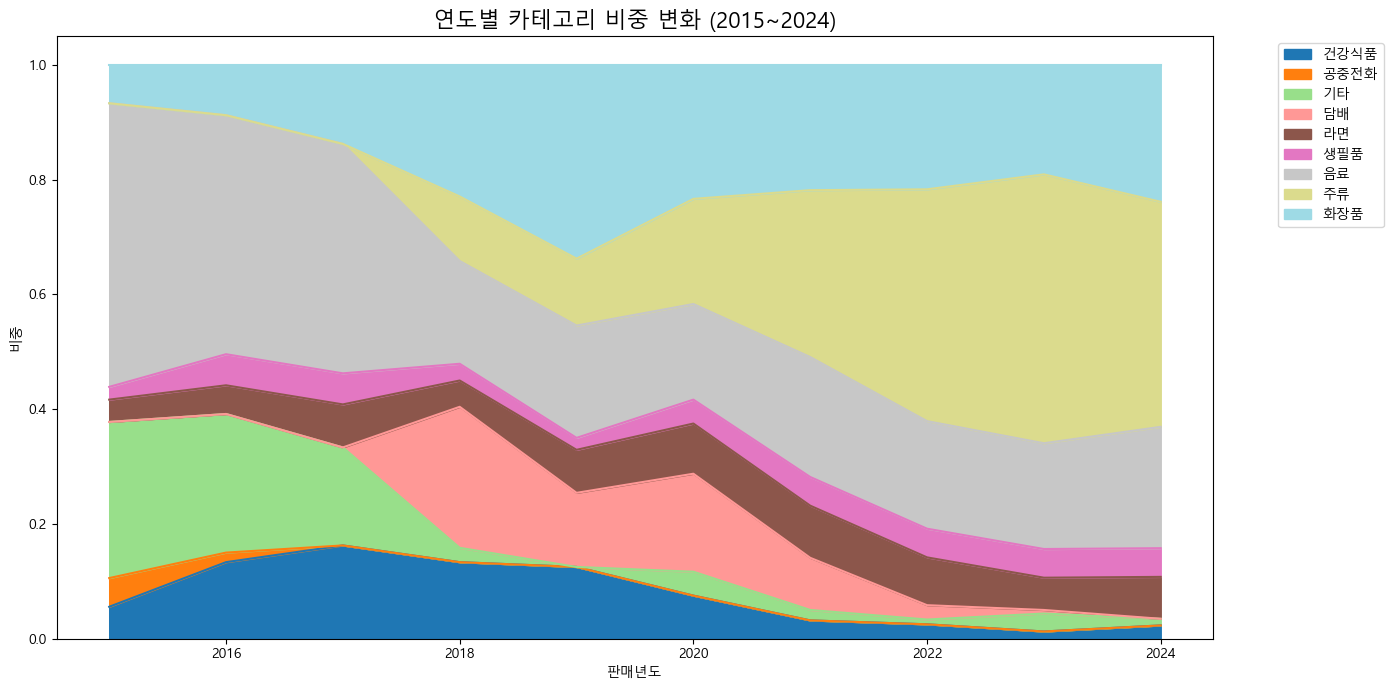

In [90]:
import matplotlib.pyplot as plt

# 연도별 카테고리 등장 횟수 집계
yearly_category_rank = (
    df.groupby(["판매년도", "카테고리"])
    .size()
    .reset_index(name="등장횟수")
)

# Pivot → 연도별 카테고리별 비중 계산
pivot_data = yearly_category_rank.pivot(index="판매년도", columns="카테고리", values="등장횟수").fillna(0)
pivot_data_ratio = pivot_data.div(pivot_data.sum(axis=1), axis=0)

# 시각화
plt.figure(figsize=(14,7))
pivot_data_ratio.plot.area(ax=plt.gca(), cmap="tab20")
plt.title("연도별 카테고리 비중 변화 (2015~2024)", fontsize=16)
plt.ylabel("비중")
plt.xlabel("판매년도")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()


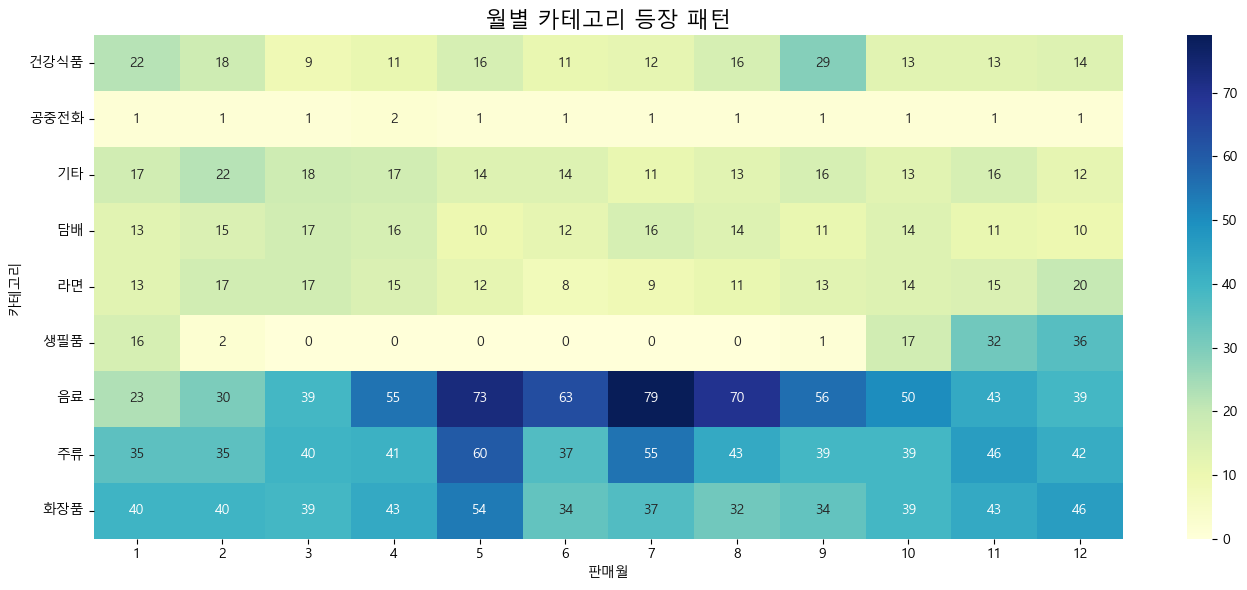

In [91]:
## (2) 월별 카테고리 패턴 (히트맵)
monthly_category_rank = (
    df.groupby(["판매월", "카테고리"])
    .size()
    .reset_index(name="등장횟수")
)

heatmap_data = monthly_category_rank.pivot(index="카테고리", columns="판매월", values="등장횟수").fillna(0)

plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("월별 카테고리 등장 패턴", fontsize=16)
plt.xlabel("판매월")
plt.ylabel("카테고리")
plt.tight_layout()
plt.show()


In [71]:
# 상품별 몇 년도에 등장했는지 계산
steady = df.groupby("상품명")["판매년도"].nunique().reset_index(name="등장연도수")

# 스테디셀러 기준: 5년 이상 등장
steady_sellers = steady[steady["등장연도수"] >= 5].sort_values("등장연도수", ascending=False)

# 반짝 상품: 1년만 등장
one_hit = steady[steady["등장연도수"] == 1]

print("=== 스테디셀러 (5년 이상) ===")
print(steady_sellers)

print("\n=== 반짝 상품 (1년만) ===")
print(one_hit)


=== 스테디셀러 (5년 이상) ===
                           상품명  등장연도수
45                         보온대     10
119                      홍삼원세트     10
55                         신라면     10
67                      육개장사발면      9
117                       홍삼보운      9
106               파워에이드마운틴블라스트      9
111                       포카리캔      9
47              보온대(충성핫팩)주머니난로      8
0        Dr.G레드-블래미쉬클리어크림_70ml      8
46                  보온대(박상병핫팩)      8
81                     카스맥주(캔)      7
80                    칠성사이다(캔)      7
16          닥터지 블랙 스네일 크림_50ml      6
51                          석수      6
70                 제주삼다수 500ml      6
89                        코카콜라      6
19          듀이트리울트라바이탈라이징스네일크림      5
12   닥터지 레드 블레미쉬 멀티 플루이드_100ml      5
15              닥터지 메디유브이 울트라선      5
38                  몬스터에너지 울트라      5
73                    참이슬fresh      5
103                  테라캔 355ml      5
94                  코카콜라(250㎖)      5

=== 반짝 상품 (1년만) ===
                             상품명  등장연도수
1    

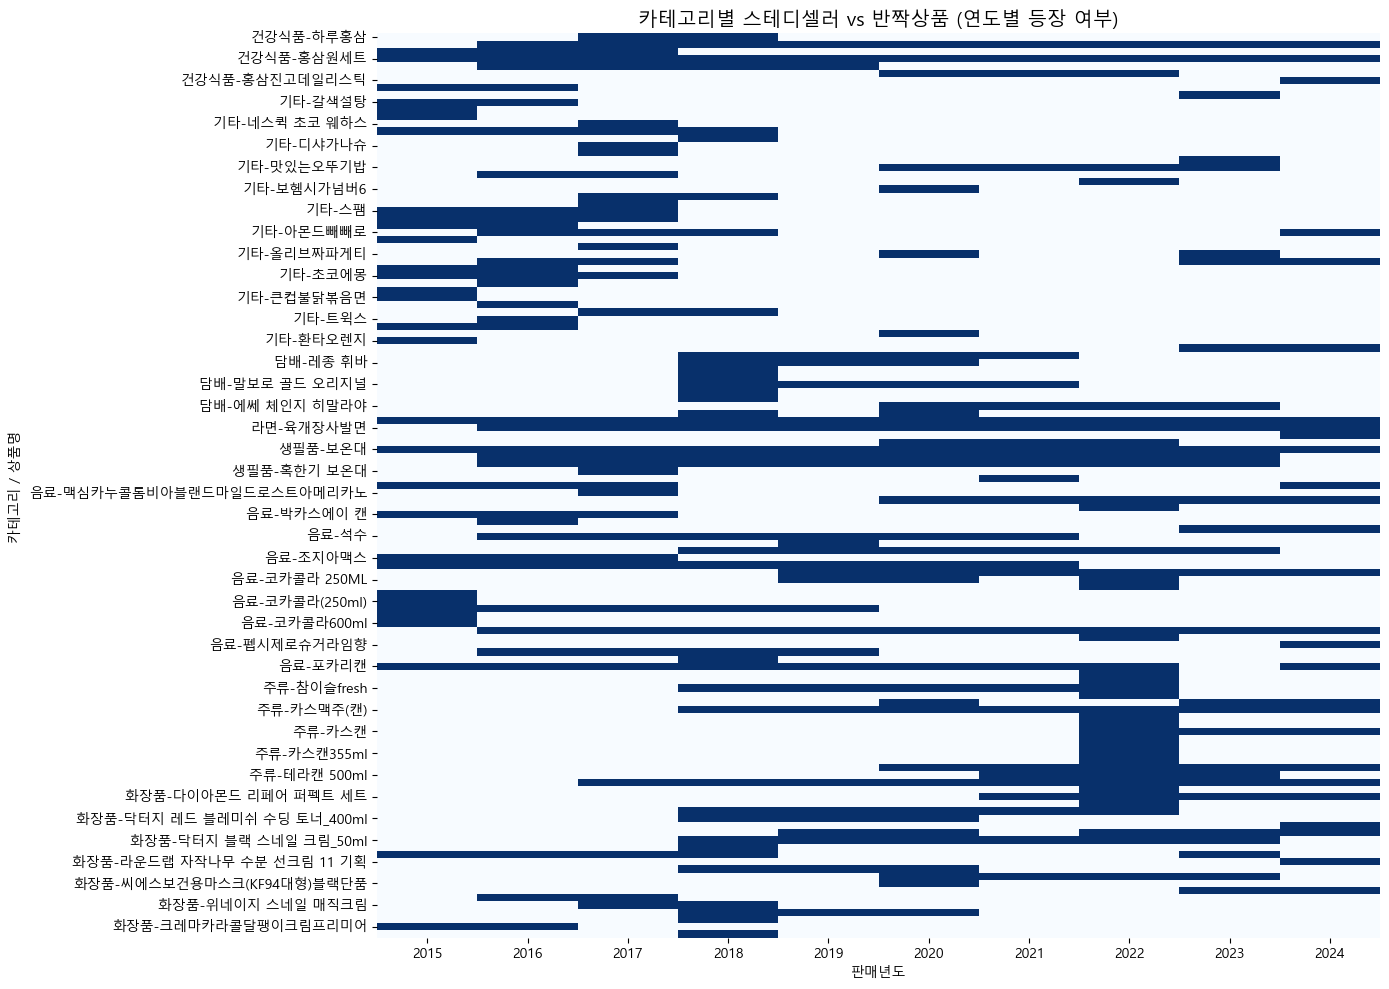

In [92]:
# 상품별 연도별 등장 여부 pivot
presence = (
    df.groupby(["상품명", "카테고리", "판매년도"])
    .size()
    .reset_index(name="등장횟수")
)
presence["등장여부"] = 1

pivot_presence = presence.pivot_table(index=["카테고리","상품명"], columns="판매년도", values="등장여부", fill_value=0)

plt.figure(figsize=(14,10))
sns.heatmap(pivot_presence, cmap="Blues", cbar=False)
plt.title("카테고리별 스테디셀러 vs 반짝상품 (연도별 등장 여부)", fontsize=14)
plt.xlabel("판매년도")
plt.ylabel("카테고리 / 상품명")
plt.tight_layout()
plt.show()


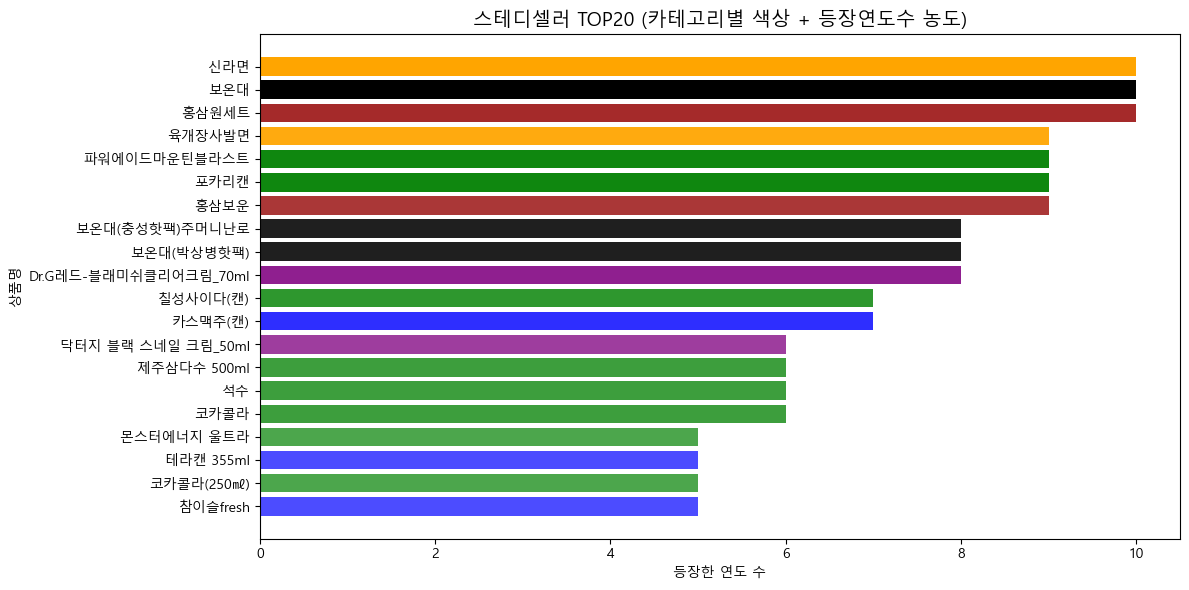

In [93]:

# 상품별 등장 연도 수
steady = df.groupby(["상품명", "카테고리"])["판매년도"].nunique().reset_index(name="등장연도수")

# 상위 스테디셀러 TOP20 추출
top_steady = steady.sort_values("등장연도수", ascending=False).head(20)

# 카테고리별 색상 팔레트 지정
palette = {
    "주류": "blue",
    "음료": "green",
    "담배": "red",
    "라면": "orange",
    "화장품": "purple",
    "건강식품": "brown",
    "공중전화": "gray",
    "기타": "lightgray"
}

plt.figure(figsize=(12,6))

# 막대 그래프 그리기 (카테고리별 색상, 농도는 등장연도수 비율로 조정)
for i, row in top_steady.iterrows():
    plt.barh(
        row["상품명"],
        row["등장연도수"],
        color=palette.get(row["카테고리"], "black"),
        alpha=0.4 + 0.6 * (row["등장연도수"] / top_steady["등장연도수"].max()) # 농도 조정
    )

plt.title("스테디셀러 TOP20 (카테고리별 색상 + 등장연도수 농도)", fontsize=14)
plt.xlabel("등장한 연도 수")
plt.ylabel("상품명")
plt.gca().invert_yaxis()  # 위에서부터 나오게
plt.tight_layout()
plt.show()

In [74]:
# 1. 상품별 등장 연도 수 계산
product_years = df.groupby("상품명")["판매년도"].nunique().reset_index(name="등장연도수")

# 2. 반짝상품 (1년만 등장)
one_hit = product_years[product_years["등장연도수"] == 1]["상품명"]

# 3. 원본 데이터에서 해당 상품들만 추출 (연도 포함)
one_hit_with_year = df[df["상품명"].isin(one_hit)][["판매년도", "상품명", "카테고리"]].drop_duplicates()

# 4. 연도별 출력
for year in sorted(one_hit_with_year["판매년도"].unique()):
    print(f"\n=== {year}년 반짝상품 ===")
    display(one_hit_with_year[one_hit_with_year["판매년도"] == year].sort_values("상품명"))



=== 2015년 반짝상품 ===


,판매년도,상품명,카테고리
2259,2015,공화춘자장컵,기타
2249,2015,나무젓가락,기타
2326,2015,암바사캔,기타
2332,2015,코카콜라(1.5L),음료
2409,2015,코카콜라(250ml),음료
2333,2015,코카콜라(600㎖),음료
2352,2015,코카콜라600ml,음료
2281,2015,코코팜 화이트 요구르트,기타
2292,2015,큰컵불닭볶음면,기타
2300,2015,환타오렌지,기타



=== 2016년 반짝상품 ===


,판매년도,상품명,카테고리
2055,2016,박카스에이캔,음료
2203,2016,츄츄케익파이_초코바닐라맛,기타
2201,2016,킷캣청키,기타
2181,2016,트윅스,기타



=== 2017년 반짝상품 ===


,판매년도,상품명,카테고리
1969,2017,네스퀵 초코 웨하스,기타
1949,2017,디샤가나슈,기타
1948,2017,딸기 꿀딴지,기타
1876,2017,맥심카누콜롬비아블랜드마일드로스트아메리카노,음료
1967,2017,빅팜불닭,기타
1886,2017,오로나민C,기타
1760,2017,혹한기 보온대,생필품



=== 2018년 반짝상품 ===


,판매년도,상품명,카테고리
1647,2018,닥터지블랙스네일크림_50ml,화장품
1749,2018,대용량주머니핫팩,기타
1640,2018,레종프렌치블랙,담배
1656,2018,레종휘바,담배
1645,2018,말보로골드오리지널,담배
1693,2018,메비우스 엘에스에스 윈드블루,담배
1654,2018,참존마유크림엑스트라골든컴플렉스,화장품
1568,2018,터지 블랙 스네일 크림_50ml,화장품
1641,2018,포카리스웨트분말,음료



=== 2019년 반짝상품 ===


,판매년도,상품명,카테고리
1305,2019,석수 500ml,음료



=== 2020년 반짝상품 ===


,판매년도,상품명,카테고리
1235,2020,보헴시가넘버6,기타
1240,2020,씨에스보건용마스크(KF94대형)블랙단품,화장품
1245,2020,하리보 메가룰렛사우어45g,기타



=== 2021년 반짝상품 ===


,판매년도,상품명,카테고리
887,2021,나랑드사이다(캔),음료



=== 2022년 반짝상품 ===


,판매년도,상품명,카테고리
596,2022,Dr.G레드-블래미쉬클리어크림_70mll,화장품
590,2022,닥터지 레드 블레미쉬 멀티 플루이드-100ml,화장품
685,2022,몬스터에너지 울트라 355ml,음료
610,2022,발렌타인 17년 500ml,기타
769,2022,참이슬 fresh,주류
587,2022,참이슬fresh 360ml,주류
707,2022,카스맥주(캔) 355ML,주류
586,2022,카스맥주(캔) 355ml,주류
647,2022,카스캔 355ml,주류
611,2022,카스캔 500ml,주류



=== 2023년 반짝상품 ===


,판매년도,상품명,카테고리
538,2023,가히 서울 링클 바운스 멀티밤,기타
536,2023,라운드랩 1025 독도 로션,기타



=== 2024년 반짝상품 ===


,판매년도,상품명,카테고리
34,2024,닥터지 로얄 블랙스네일 크림 기획_50ml15ml,화장품
113,2024,라운드랩 자작나무 수분 선크림 11 기획,화장품
18,2024,마이핫 보온대 장병용 180g,생필품
202,2024,펩시제로슈거라임향,기타
92,2024,홍삼진고데일리스틱,건강식품


In [75]:
# 상품별 등장 연도 수 계산
product_years = df.groupby("상품명")["판매년도"].nunique().reset_index(name="등장연도수")

# 반짝상품 (1년만 등장)
one_hit = product_years[product_years["등장연도수"] == 1]["상품명"]

# 반짝상품 중 화장품 카테고리만 추출
one_hit_cosmetic = df[df["상품명"].isin(one_hit) & (df["카테고리"] == "화장품")][
    ["판매년도", "상품명", "카테고리"]
].drop_duplicates()

# 연도별 출력
for year in sorted(one_hit_cosmetic["판매년도"].unique()):
    print(f"\n=== {year}년 PX 화장품 반짝상품 ===")
    display(one_hit_cosmetic[one_hit_cosmetic["판매년도"] == year].sort_values("상품명"))



=== 2018년 PX 화장품 반짝상품 ===


,판매년도,상품명,카테고리
1647,2018,닥터지블랙스네일크림_50ml,화장품
1654,2018,참존마유크림엑스트라골든컴플렉스,화장품
1568,2018,터지 블랙 스네일 크림_50ml,화장품



=== 2020년 PX 화장품 반짝상품 ===


,판매년도,상품명,카테고리
1240,2020,씨에스보건용마스크(KF94대형)블랙단품,화장품



=== 2022년 PX 화장품 반짝상품 ===


,판매년도,상품명,카테고리
596,2022,Dr.G레드-블래미쉬클리어크림_70mll,화장품
590,2022,닥터지 레드 블레미쉬 멀티 플루이드-100ml,화장품



=== 2024년 PX 화장품 반짝상품 ===


,판매년도,상품명,카테고리
34,2024,닥터지 로얄 블랙스네일 크림 기획_50ml15ml,화장품
113,2024,라운드랩 자작나무 수분 선크림 11 기획,화장품


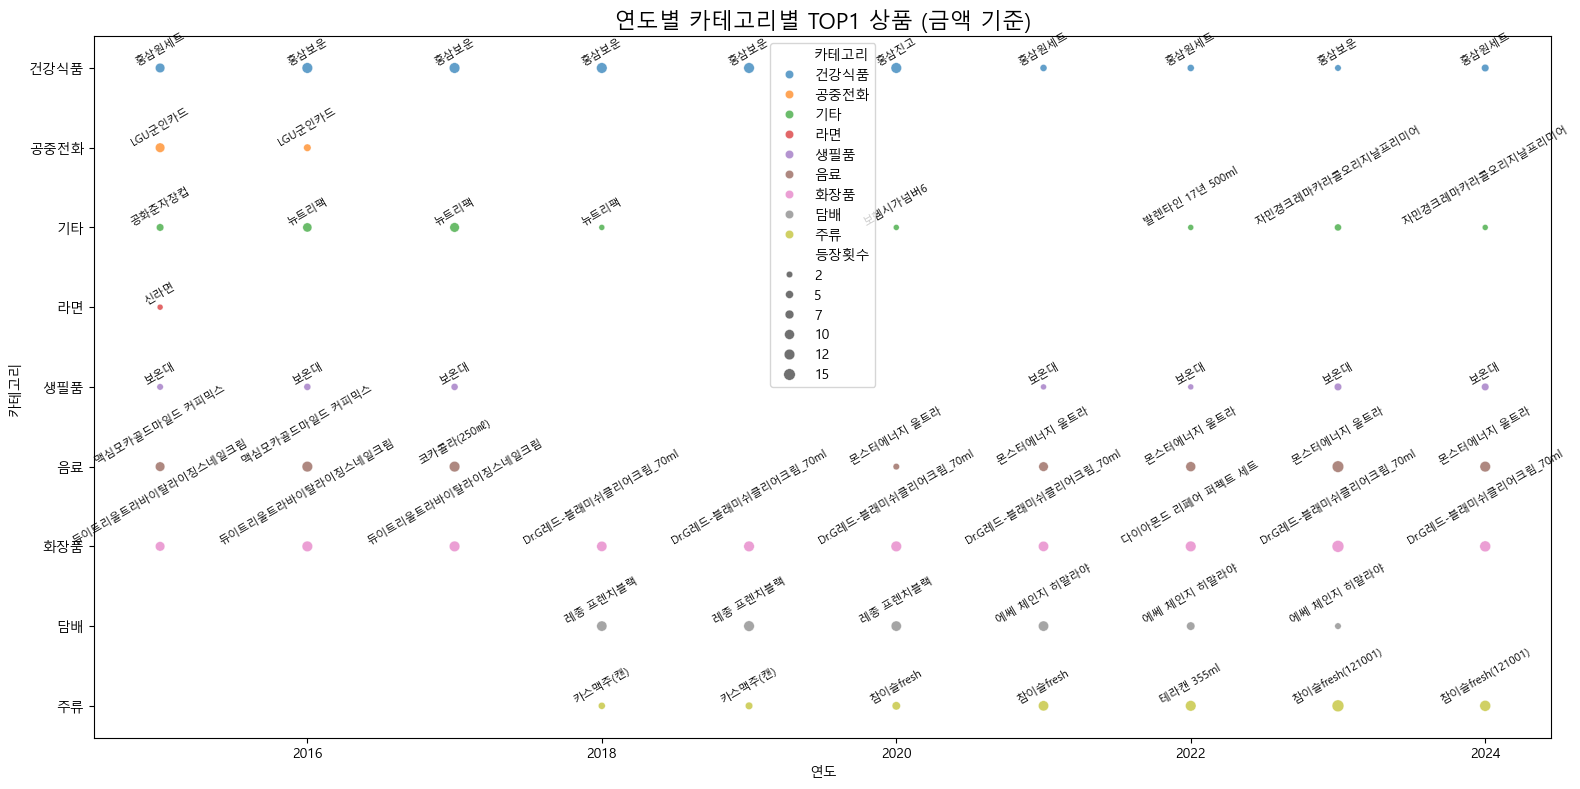

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 금액 기준만 필터링
amount_df = df[df["선정기준"] == "금액"]

# 2. 연도별·카테고리별·상품별 등장 횟수 집계
yearly_cat_items_amount = (
    amount_df.groupby(["판매년도", "카테고리", "상품명"])
    .size()
    .reset_index(name="등장횟수")
    .sort_values(["판매년도", "카테고리", "등장횟수"], ascending=[True, True, False])
)

# 3. 연도별·카테고리별 TOP1 상품 추출
top1_amount = yearly_cat_items_amount.groupby(["판매년도", "카테고리"]).head(1)

# 4. 시각화
plt.figure(figsize=(16,8))
sns.scatterplot(
    data=top1_amount,
    x="판매년도", y="카테고리",
    hue="카테고리", size="등장횟수", alpha=0.7, legend="brief"
)

# 상품명 라벨 붙이기
for i, row in top1_amount.iterrows():
    plt.text(row["판매년도"], row["카테고리"], row["상품명"],
             fontsize=8, ha="center", va="bottom", rotation=30)

plt.title("연도별 카테고리별 TOP1 상품 (금액 기준)", fontsize=16)
plt.xlabel("연도")
plt.ylabel("카테고리")
plt.tight_layout()
plt.show()


In [94]:
# 화장품 카테고리만 추출
cosmetic_df = df[df["카테고리"] == "화장품"]

# 상품별 등장 연도 수
cosmetic_years = cosmetic_df.groupby("상품명")["판매년도"].nunique().reset_index(name="등장연도수")

# 스테디셀러 (5년 이상)
cosmetic_steady = cosmetic_years[cosmetic_years["등장연도수"] >= 5]

# 반짝상품 (1년만)
cosmetic_one_hit = cosmetic_years[cosmetic_years["등장연도수"] == 1]

print("=== PX 화장품 스테디셀러 ===")
display(cosmetic_steady.sort_values("등장연도수", ascending=False))

print("\n=== PX 화장품 반짝상품 ===")
display(cosmetic_one_hit.sort_values("상품명"))


=== PX 화장품 스테디셀러 ===


,상품명,등장연도수
0,Dr.G레드-블래미쉬클리어크림_70ml,8
8,닥터지 블랙 스네일 크림_50ml,6
4,닥터지 레드 블레미쉬 멀티 플루이드_100ml,5
7,닥터지 메디유브이 울트라선,5
10,듀이트리울트라바이탈라이징스네일크림,5



=== PX 화장품 반짝상품 ===


,상품명,등장연도수
1,Dr.G레드-블래미쉬클리어크림_70mll,1
3,닥터지 레드 블레미쉬 멀티 플루이드-100ml,1
6,닥터지 로얄 블랙스네일 크림 기획_50ml15ml,1
9,닥터지블랙스네일크림_50ml,1
11,라운드랩 자작나무 수분 선크림 11 기획,1
14,씨에스보건용마스크(KF94대형)블랙단품,1
19,참존마유크림엑스트라골든컴플렉스,1
21,터지 블랙 스네일 크림_50ml,1
